# Assignment 2
Part 1: Sentiment Analysis using VADER, TextBlob and Flair libraries.


The data set is the training validation portion from this site:
https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?resource=download&select=twitter_validation.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("twitter.csv", encoding = 'utf8', names=['ID', 'entity', 'sentiment', 'content'])

In [3]:
df

,ID,entity,sentiment,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


<Axes: xlabel='sentiment', ylabel='count'>

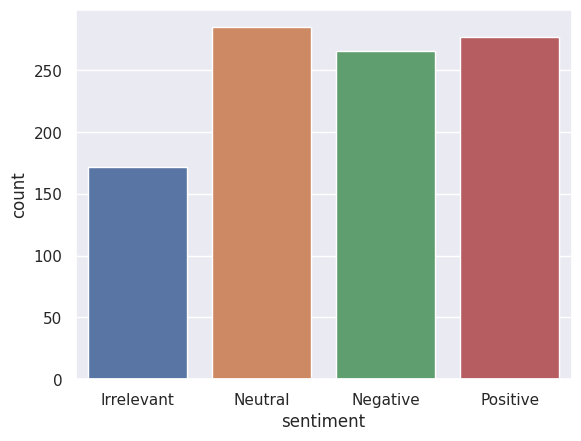

In [4]:
sns.countplot(x = 'sentiment', data=df)

In [5]:
# Dropping the rows where the sentiment is 'Irrelevant'
df = df.drop(df[df.sentiment == 'Irrelevant'].index)
df

,ID,entity,sentiment,content
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


<Axes: xlabel='sentiment', ylabel='count'>

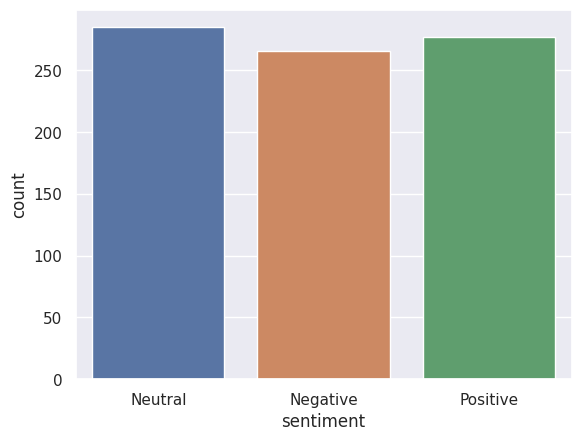

In [6]:
sns.countplot(x = 'sentiment', data=df)

# VADER

In [7]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
# examples of sentences
sentences = ['I love you!', 'I hate you!!!', 'I have no feelings towards you...', 'In 1980, a treaty was signed.']

In [10]:
# defining a function to catalog a sentence as Positive, Neutral or Negative.
def sent_result(sent_analaysis):
  if sent_analaysis['compound'] >= 0.05:
    return 'Positive'
  elif sent_analaysis['compound'] > -0.05:
    return 'Neutral'
  else:
    return 'Negative'

In [16]:
analyzer = SentimentIntensityAnalyzer()

In [17]:
for sentence in sentences:
    sent_analaysis = analyzer.polarity_scores(sentence)
    print("{:-<50} {} {}".format(sentence, str(sent_analaysis), str(sent_result(sent_analaysis)) ) )

I love you!--------------------------------------- {'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696} Positive
I hate you!!!------------------------------------- {'neg': 0.696, 'neu': 0.304, 'pos': 0.0, 'compound': -0.6784} Negative
I have no feelings towards you...----------------- {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.296} Negative
In 1980, a treaty was signed.--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} Neutral


In [18]:
df1 = df

In [19]:
df1['scores']=df1['content'].apply(lambda content: analyzer.polarity_scores(str(content)))
df1

,ID,entity,sentiment,content,scores
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,"{'neg': 0.157, 'neu': 0.637, 'pos': 0.206, 'co..."
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,"{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'comp..."
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...","{'neg': 0.178, 'neu': 0.651, 'pos': 0.172, 'co..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp..."
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,"{'neg': 0.022, 'neu': 0.811, 'pos': 0.167, 'co..."
...,...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...,"{'neg': 0.259, 'neu': 0.607, 'pos': 0.135, 'co..."
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp..."
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,"{'neg': 0.229, 'neu': 0.692, 'pos': 0.079, 'co..."
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp..."


In [20]:
df1_1 = df1

In [21]:
df1_1['prediction']=df1_1['scores'].map(sent_result)
df1_1

,ID,entity,sentiment,content,scores,prediction
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,"{'neg': 0.157, 'neu': 0.637, 'pos': 0.206, 'co...",Neutral
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,"{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'comp...",Negative
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...","{'neg': 0.178, 'neu': 0.651, 'pos': 0.172, 'co...",Neutral
4,4433,Google,Neutral,Now the President is slapping Americans in the...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Positive
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,"{'neg': 0.022, 'neu': 0.811, 'pos': 0.167, 'co...",Positive
...,...,...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...,"{'neg': 0.259, 'neu': 0.607, 'pos': 0.135, 'co...",Negative
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",Positive
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,"{'neg': 0.229, 'neu': 0.692, 'pos': 0.079, 'co...",Negative
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",Positive


In [22]:
y = df1_1['sentiment']
y_pred = df1_1['prediction']
print(len(y), len(y_pred))

828 828


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    Negative       0.49      0.61      0.54       266
     Neutral       0.38      0.12      0.18       285
    Positive       0.50      0.73      0.59       277

    accuracy                           0.48       828
   macro avg       0.46      0.49      0.44       828
weighted avg       0.45      0.48      0.44       828



#TextBlob

In [24]:
!pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('all')

In [27]:
# examples of sentences
sentences = ['I love you!', 
             'I hate you!!!', 
             'I have no feelings towards you...', 
             'In 1980, a treaty was signed.', 
             'I ABSOLUTELY LOVE Machine Learning']

In [28]:
# defining a function to catalog a sentence as Positive, Neutral or Negative.
def sent_result_blob(sentence):
  blob = TextBlob(sentence)
  if blob.sentiment.polarity >= 0.05:
    return 'Positive'
  elif blob.sentiment.polarity > -0.05:
    return 'Neutral'
  else:
    return 'Negative'

In [29]:
for sentence in sentences:
  blob = TextBlob(sentence)
  print(blob.tags)
  print(blob.noun_phrases)
  print(blob.sentiment)
  print(sent_result_blob(sentence))
  print('-'*50)

[('I', 'PRP'), ('love', 'VBP'), ('you', 'PRP')]
[]
Sentiment(polarity=0.625, subjectivity=0.6)
Positive
--------------------------------------------------
[('I', 'PRP'), ('hate', 'VBP'), ('you', 'PRP')]
[]
Sentiment(polarity=-1.0, subjectivity=0.9)
Negative
--------------------------------------------------
[('I', 'PRP'), ('have', 'VBP'), ('no', 'DT'), ('feelings', 'NNS'), ('towards', 'IN'), ('you', 'PRP')]
[]
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
--------------------------------------------------
[('In', 'IN'), ('1980', 'CD'), ('a', 'DT'), ('treaty', 'NN'), ('was', 'VBD'), ('signed', 'VBN')]
[]
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
--------------------------------------------------
[('I', 'PRP'), ('ABSOLUTELY', 'VBP'), ('LOVE', 'JJ'), ('Machine', 'NNP'), ('Learning', 'NNP')]
['absolutely love machine learning']
Sentiment(polarity=0.5, subjectivity=0.6)
Positive
--------------------------------------------------


In [30]:
df = pd.read_csv("twitter.csv", encoding = 'utf8', names=['ID', 'entity', 'sentiment', 'content'])
df

,ID,entity,sentiment,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [31]:
# Dropping the rows where the sentiment is 'Irrelevant'
df = df.drop(df[df.sentiment == 'Irrelevant'].index)
df

,ID,entity,sentiment,content
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [32]:
df2 = df
df2['prediction']=df['content'].map(sent_result_blob)
df2

,ID,entity,sentiment,content,prediction
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,Negative
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",Negative
4,4433,Google,Neutral,Now the President is slapping Americans in the...,Positive
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,Negative
...,...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...,Neutral
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...,Positive
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,Negative
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,Neutral


In [33]:
y = df2['sentiment']
y_pred = df2['prediction']
print(len(y), len(y_pred))

828 828


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    Negative       0.50      0.49      0.50       266
     Neutral       0.39      0.28      0.33       285
    Positive       0.51      0.66      0.58       277

    accuracy                           0.48       828
   macro avg       0.47      0.48      0.47       828
weighted avg       0.47      0.48      0.47       828



#Flair

In [35]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 47.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.8 MB/s eta 0:00:0

In [36]:
from flair.data import Sentence
from flair.nn import Classifier

In [37]:
# examples of phrases
phrases = ['I love you!', 
             'I hate you!!!', 
             'I have no feelings towards you...', 
             'In 1980, a treaty was signed.', 
             'I ABSOLUTELY LOVE Machine Learning']

In [38]:
# defining a function to catalog a sentence as Positive, Neutral or Negative.
def sent_result_flair(phrase):
  sentence = Sentence(phrase) # make a (flair)Sentence
  tagger = Classifier.load('sentiment') # load the NER sentiment classifier
  tagger.predict(sentence) # run NER classifier over sentence
  result = sentence.labels[0].to_dict()['value']
  if result == 'POSITIVE':
    return 'Positive'
  else:
    return 'Negative'

In [39]:
for phrase in phrases:
  print(phrase)
  print(sent_result_flair(phrase))
  print('-'*50)

I love you!
2023-06-05 01:27:57,895 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp2m2uu5uz


100%|██████████| 253M/253M [00:11<00:00, 23.7MB/s]

2023-06-05 01:28:09,452 copying /tmp/tmp2m2uu5uz to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-06-05 01:28:10,397 removing temp file /tmp/tmp2m2uu5uz


Positive
--------------------------------------------------
I hate you!!!
Negative
--------------------------------------------------
I have no feelings towards you...
Negative
--------------------------------------------------
In 1980, a treaty was signed.
Positive
--------------------------------------------------
I ABSOLUTELY LOVE Machine Learning
Positive
--------------------------------------------------


In [40]:
df

,ID,entity,sentiment,content,prediction
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,Negative
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",Negative
4,4433,Google,Neutral,Now the President is slapping Americans in the...,Positive
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,Negative
...,...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...,Neutral
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...,Positive
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,Negative
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,Neutral


In [41]:
df = pd.read_csv("twitter.csv", encoding = 'utf8', names=['ID', 'entity', 'sentiment', 'content'])
df

,ID,entity,sentiment,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [42]:
# Dropping the rows where the sentiment is 'Irrelevant'
df = df.drop(df[df.sentiment == 'Irrelevant'].index)
df

,ID,entity,sentiment,content
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [43]:
df3 = df
df3['prediction']=df3['content'].map(sent_result_flair)
df3

,ID,entity,sentiment,content,prediction
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,Negative
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,Negative
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",Negative
4,4433,Google,Neutral,Now the President is slapping Americans in the...,Negative
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,Negative
...,...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...,Negative
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...,Positive
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,Positive
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,Positive


In [44]:
y = df3['sentiment']
y_pred = df3['prediction']
print(len(y), len(y_pred))

828 828


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    Negative       0.52      0.87      0.65       266
     Neutral       0.00      0.00      0.00       285
    Positive       0.55      0.77      0.64       277

    accuracy                           0.54       828
   macro avg       0.36      0.55      0.43       828
weighted avg       0.35      0.54      0.42       828



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
